### Bit Error Rate (BER) of BPSK modulation with noise

SNR = -3 dB: Total Errors = 157958, Total Symbols = 1000000
SNR = -2 dB: Total Errors = 130681, Total Symbols = 1000000
SNR = -1 dB: Total Errors = 103829, Total Symbols = 1000000
SNR = 0 dB: Total Errors = 77961, Total Symbols = 1000000
SNR = 1 dB: Total Errors = 56358, Total Symbols = 1000000
SNR = 2 dB: Total Errors = 37652, Total Symbols = 1000000
SNR = 3 dB: Total Errors = 22841, Total Symbols = 1000000
SNR = 4 dB: Total Errors = 12586, Total Symbols = 1000000
SNR = 5 dB: Total Errors = 5795, Total Symbols = 1000000
SNR = 6 dB: Total Errors = 2412, Total Symbols = 1000000
SNR = 7 dB: Total Errors = 790, Total Symbols = 1000000
SNR = 8 dB: Total Errors = 184, Total Symbols = 1000000
SNR = 9 dB: Total Errors = 107, Total Symbols = 3000000
SNR = 10 dB: Total Errors = 102, Total Symbols = 29000000


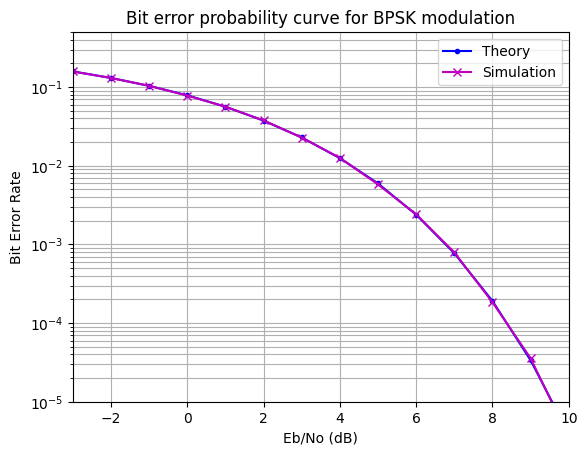

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# Parameters
N = int(1e6)  # number of bits or symbols per iteration
np.random.seed(100)  # initializing the random number generator

# Eb/N0 values
Eb_N0_dBs = np.arange(-3, 11)  # multiple Eb/N0 values

nErr = []  # to store the number of errors
totalBits = []  # to store the total number of bits processed for each Eb/N0

for Eb_N0_dB in Eb_N0_dBs:
    errors = 0
    bitsProcessed = 0

    iteration = 0  # Track the number of iterations
    while errors < 100:  # Run until at least 100 errors are observed
        iteration += 1

        # Generate random bits
        ip = np.random.rand(N) > 0.5  # generating 0,1 with equal probability
        s = 2 * ip - 1  # BPSK modulation: 0 -> -1; 1 -> 1

        # Noise 
        Eb_N0 = 10**(-Eb_N0_dB / 20)
        sigma = Eb_N0 / np.sqrt(2)  # noise std deviation for BPSK over AWGN

        # Generate noise
        n = (np.random.randn(N) + 1j * np.random.randn(N))  # AWGN, complex Gaussian noise

        # Noise addition
        y = s + sigma * n  # additive white Gaussian noise

        # Receiver - hard decision decoding
        ipHat = np.real(y) > 0

        # Counting the errors
        currentErrors = np.sum(ip != ipHat)
        errors += currentErrors
        bitsProcessed += N

    nErr.append(errors)
    totalBits.append(bitsProcessed)

    print(f"SNR = {Eb_N0_dB} dB: Total Errors = {errors}, Total Symbols = {bitsProcessed}")  # Print errors and symbols    

# Simulated BER
simBer = np.array(nErr) / np.array(totalBits)

# Theoretical BER
theoryBer = 0.5 * erfc(np.sqrt(10 ** (Eb_N0_dBs / 10)))

# Plot
plt.figure()
plt.semilogy(Eb_N0_dBs, theoryBer, 'b.-', label='Theory')
plt.semilogy(Eb_N0_dBs, simBer, 'mx-', label='Simulation')
plt.axis([-3, 10, 1e-5, 0.5])
plt.grid(True, which='both')
plt.legend()
plt.xlabel('Eb/No (dB)')
plt.ylabel('Bit Error Rate')
plt.title('Bit error probability curve for BPSK modulation')
plt.show()